# Headline Generation
This notebook revolves around generating headlines from our own encodings. The first handful of cells are just experimentation, that we do not dare delete.

Author: lkt259@alumni.ku.dk

In [5]:
import numpy as np
train_X = np.load('xtra_features_header/trainX.npy', allow_pickle=True)[()]
train_y = np.load('xtra_features_header/trainY.npy', allow_pickle=True)
test_X = np.load('xtra_features_header/testX.npy', allow_pickle=True)[()]
test_y = np.load('xtra_features_header/testY.npy', allow_pickle=True)

train_X = train_X.toarray()
test_X = test_X.toarray()

In [6]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [1]:
import pickle
with open('articles.dat', 'rb') as f:
    data = pickle.load(f)
data = list(set(data))

In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=1000)

In [7]:
ida = []
for i in train_X:
    if type(i[0]) == str and type(i[1]) == str:
        ida.append(i)
train = ida
len(train_X)

89956

In [1]:
from headliner.trainer import Trainer
from headliner.model.transformer_summarizer import TransformerSummarizer
from headliner.model.basic_summarizer import BasicSummarizer
from headliner.model.attention_summarizer import AttentionSummarizer

# summarizer = BasicSummarizer(embedding_size=1024)
# trainer = Trainer(batch_size=64, 
#                   steps_per_epoch=100, 
#                   steps_to_log=20, 
#                   max_output_len=40)
# trainer.train(summarizer, train, num_epochs=100, val_data=test)

In [9]:
lines = train
print("predicted:", summarizer.predict(lines[1][0]), '\ntarget: ',lines[1][1])
print()
print("predicted:", summarizer.predict(lines[10][0]), '\ntarget: ',lines[10][1])
print()
print("predicted:", summarizer.predict(lines[100][0]), '\ntarget: ',lines[100][1])
print()
print("predicted:", summarizer.predict(lines[1000][0]), '\ntarget: ',lines[1000][1])
print()
print("predicted:", summarizer.predict(lines[2000][0]), '\ntarget: ',lines[2000][1])
print()
print("predicted:", summarizer.predict(lines[3000][0]), '\ntarget: ',lines[3000][1])
print()
print("predicted:", summarizer.predict(lines[4000][0]), '\ntarget: ',lines[4000][1])
print()
print("predicted:", summarizer.predict(lines[5000][0]), '\ntarget: ',lines[5000][1])

NameError: name 'summarizer' is not defined

In [7]:
#DET ER DENNE HER VI GÅR MED
summarizer = BasicSummarizer(embedding_size=1024, lstm_size=1024, max_prediction_len=30)
trainer = Trainer(batch_size=64, 
                  steps_per_epoch=100, 
                  steps_to_log=20, 
                  max_output_len=30,
                 model_save_path='basicsummarizer1024')
trainer.train(summarizer, train, num_epochs=30, val_data=test)

training a bare model, preprocessing data to init model...
fitting tokenizers...
vocab encoder: 200001, vocab decoder: 100289
epoch 0, batch 20, logs: {'loss': 3.274867630004883}
epoch 0, batch 40, logs: {'loss': 3.09373779296875}
epoch 0, batch 60, logs: {'loss': 2.968243153889974}
epoch 0, batch 80, logs: {'loss': 2.8882061004638673}
epoch 0, batch 100, logs: {'loss': 2.8354534912109375}

(input) <start> brandvæsnet i sydøstjylland havde ekstraordinært travlt tirsdag eftermiddag . på to timer havde de intet mindre end fem markbrande i området ved brædstrup , der ligger nordvest for horsens . alle brandene er slukket . - det starter på fuglrisvej i brædstrup omkring klokken # .# , derefter opstår der et par brande på en anden vej i området , siger henrik dam , der er vagtchef i sydøstjyllands politi . vag <end> 
(target) <start> pludselig blev der travlt fem brande på to timer ved samme by <end> 
(prediction) i er i i i i <end>


(input) <start> danmarks rolle i vm-kvalifikationen kan

In [4]:
summarizer = BasicSummarizer.load('manual_encodings_basicsummarizer1024_TEST')

In [19]:
import random
import numpy as np

outlines = []
for i in test[:10]:
    print(i[1])
    outlines.append(f"Target: {i[1]}\tPredicted: {summarizer.predict(i[0])}\n")

Chrome har fået nye tilføjelser
Opråb fra 'det hvide Danmark': Send flere flygtninge
Busrejser til Moldova - Læs historien her
35-årig stopper usædvanlig karriere
Sådan har Tori Spelling indrettet børneværelset | BILLED-BLADET
Adam Holm - en engageret stridsmand for det frie ord
Babydrømme kan give depression: Sådan redder du parforholdet og din fertilitet
Renault-stjerne disket: Uventet hjælp til Kevin
Liveinterview med Mogens Lykketoft og Uffe Ellemann-Jensen
Økologisk kød er supermarkedernes nye slagmark


In [41]:
with open('headline_predictions.txt', 'w', encoding='utf-8') as f:
    f.writelines(outlines)

In [11]:
train, test = train_data, test_data

In [24]:
%%capture cap --no-stderr
[print(x.split('\t')) for x in outlines]

In [25]:
with open('output.txt', 'w') as f:
    f.write(cap.stdout)

# Using our own encodings
Ignore the shit above this cell

In [1]:
import scipy
import pickle
import numpy as np
from tqdm.notebook import tqdm

In [2]:
from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
from IPython.utils.capture import capture_output

@magic_arguments.magic_arguments()
@magic_arguments.argument('output', type=str, default='', nargs='?',
    help="""The name of the variable in which to store output.
    This is a utils.io.CapturedIO object with stdout/err attributes
    for the text of the captured output.
    CapturedOutput also has a show() method for displaying the output,
    and __call__ as well, so you can use that to quickly display the
    output.
    If unspecified, captured output is discarded.
    """
)
@magic_arguments.argument('--no-stderr', action="store_true",
    help="""Don't capture stderr."""
)
@magic_arguments.argument('--no-stdout', action="store_true",
    help="""Don't capture stdout."""
)
@magic_arguments.argument('--no-display', action="store_true",
    help="""Don't capture IPython's rich display."""
)
@register_cell_magic
def tee(line, cell):
    args = magic_arguments.parse_argstring(tee, line)
    out = not args.no_stdout
    err = not args.no_stderr
    disp = not args.no_display
    with capture_output(out, err, disp) as io:
        get_ipython().run_cell(cell)
    if args.output:
        get_ipython().user_ns[args.output] = io
    
    io()

In [3]:
%%tee cap
%%time
train_X = np.load('Data/additional/xtra_features_header_v2/trainX.npy', allow_pickle=True)[()]
test_X = np.load('Data/additional/xtra_features_header_v2/testX.npy', allow_pickle=True)[()]
print("Loaded.")
train_X.data = np.nan_to_num(train_X.data) #Remove NaN and Inf
test_X.data = np.nan_to_num(test_X.data)

train_X = train_X.toarray()
test_X = test_X.toarray()

train_y = np.load('Data/additional/xtra_features_header_v2/trainY.npy', allow_pickle=True)
test_y = np.load('Data/additional/xtra_features_header_v2/testY.npy', allow_pickle=True)

Loaded.
CPU times: user 3.84 s, sys: 8.72 s, total: 12.6 s
Wall time: 26.3 s


In [4]:
import pickle
with open('Data/additional/xtra_features_header_v2/index_to_label.dat', 'rb') as f:
    y2str = pickle.load(f)

train_headers = [y2str[str(x)] for x in tqdm(train_y)]
test_headers = [y2str[str(x)] for x in tqdm(test_y)]

  0%|          | 0/171936 [00:00<?, ?it/s]

  0%|          | 0/42985 [00:00<?, ?it/s]

In [6]:
# with open("svd_trainX.dat", 'wb') as f:
#     pickle.dump(train_X, f)

# with open("svd_testX.dat", 'wb') as f:
#     pickle.dump(test_X, f)

In [5]:
import abc
from headliner.preprocessing.tokenizer import Tokenizer

class TrickTokenizer(Tokenizer):
    '''This tokenizer is actually just tricking Headliner ;-)
    The input is strings, which will be converted to arrays.'''
    def __init__(self):
        self.printed = False
    
    def encode(self, text):
        '''Text is simply just converting string to array'''
        text = text.replace('<start>', '')
        text = text.replace('<end>', '')
        text = text.replace(' ', '')
        text = text.replace('[', '')
        text = text.replace(']', '')
        if not self.printed:
            # print(text)
            # print()
            # print(np.fromstring(text, dtype=float, sep=','))
            # print()
            # print(type(np.fromstring(text, dtype=float, sep=',')))
            self.printed = True
        return np.fromstring(text, dtype=float, sep=',')
    
    def decode(self, sequence):
        return "NOTHING"
    
    @property
    def vocab_size(self):
        return 200000

In [6]:
def create_dataset(arrays, headers):
    '''Indices must correspond'''
    assert len(arrays) == len(headers), "Mismatch in lenghts of inputs"
    dataset = []
    for i in tqdm(range(len(arrays))):
        dataset.append((str(arrays[i].tolist()), headers[i]))
    
    return dataset

In [11]:
train_data = create_dataset(train_X, train_headers)
test_data = create_dataset(test_X, test_headers)

  0%|          | 0/171936 [00:00<?, ?it/s]

In [12]:
%%time
from headliner.trainer import Trainer
from headliner.model.transformer_summarizer import TransformerSummarizer
from headliner.model.basic_summarizer import BasicSummarizer
from headliner.model.attention_summarizer import AttentionSummarizer
from sklearn.model_selection import train_test_split
from headliner.preprocessing.preprocessor import Preprocessor

train, test = train_data, test_data

preprocessor = Preprocessor(lower_case=True, hash_numbers=False)
temp_train = [('body', x[1]) for x in train]
print("yolo")
train_prep = [preprocessor(t) for t in temp_train]
targets_prep = [t[1] for t in tqdm(train_prep)]

yolo


  0%|          | 0/171936 [00:00<?, ?it/s]

CPU times: user 1.88 s, sys: 45.8 ms, total: 1.93 s
Wall time: 1.92 s


In [13]:
from tensorflow_datasets.core.deprecated.text import SubwordTextEncoder
from headliner.preprocessing import Vectorizer
tokenizer_input = TrickTokenizer()
tokenizer_target = SubwordTextEncoder.build_from_corpus(
    targets_prep, target_vocab_size=2**13,  reserved_tokens=[preprocessor.start_token, preprocessor.end_token])

vectorizer = Vectorizer(tokenizer_input, tokenizer_target)

In [14]:
%%time
%%tee cap
#1024, 1024
#summarizer = BasicSummarizer(embedding_size=1024, lstm_size=1024, max_prediction_len=30, embedding_encoder_trainable=False)
#summarizer.init_model(preprocessor, vectorizer)
summarizer = BasicSummarizer.load('FINAL_MODEL')
#trainer = Trainer(batch_size=64, 
#                  steps_per_epoch=100, 
#                  steps_to_log=20, 
#                  max_output_len=30,
#                 model_save_path='final_TEST')
#trainer.train(summarizer, train, num_epochs=100, val_data=test)

CPU times: user 1.19 s, sys: 85.6 ms, total: 1.28 s
Wall time: 1.55 s


In [ ]:
with open('output.txt', 'w') as f:
    f.write(cap())

Other bullshit

In [20]:
for i, line in enumerate(train):
    b = vectorizer.encode_input(line[0])
    if type(b) != np.ndarray:
        print(i)

In [31]:
train[0]

('[264.0967412348773, -2.2629539593663237, 107.37642557069023, -42.799959653854216, -1.808741015731543, 4.712803044779263, 0.05305541540200809, -0.09993568223233712, 0.9971479186705767, -1.1963794141212243, -0.054964758822794224, 0.1546939743989027, 0.11430794853698917, 0.10227953029947304, -0.04732933913512788, -0.4548853507650048, 0.10786322298967779, -0.03646803497529717, 0.0061893284503155895, -0.23475136500601632, 0.1416390188423143, 0.25641521992257243, 0.26605719822638, -0.030755655691614016, 0.07196379071379412, 0.25043473373313846, -0.1891623991951645, -0.027392517898229284, -0.10799947008883994, -0.05920810548178683, -0.012857366596294877, 0.032238186322671836, 0.30026722462569394, -0.18470348524271835, -0.2793667664296677, -0.12380844526331616, 0.10301580827255372, -0.2696060152298315, 0.16625275490317168, 0.05886286975936505, 0.05115501347997637, 0.14485657867420051, -0.07691096997389105, -0.020669541042194792, -0.1503701908116239, 0.1108229334629889, -0.20889839225977164, 

In [34]:
vectorizer.encode_input(train[0][0]).shape

(100,)

In [27]:
vectorize_train = trainer._vectorize_data(preprocessor=summarizer.preprocessor,
                                          vectorizer=summarizer.vectorizer,
                                          bucket_generator=trainer.bucket_generator)

In [28]:
train_gen, val_gen = trainer._create_dataset_generators(summarizer)
train_dataset = train_gen(lambda: vectorize_train(train))

In [29]:
train_step = summarizer.new_train_step(trainer.loss_function, trainer.batch_size, apply_gradients=True)

In [ ]:
[   4,  175,  991,   21, 4466,    5,  954, 3371,  205,   10,    5,
        106,  598,  877, 8013, 3836,   15,   21,    7, 7799, 4188,    3,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0]

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=100)
pca.fit(train_X)

PCA(n_components=100)

In [20]:
sum(pca.explained_variance_ratio_)

0.9999890960420865

In [21]:
train_X = pca.transform(train_X)

In [22]:
train_X.shape

(23174, 100)

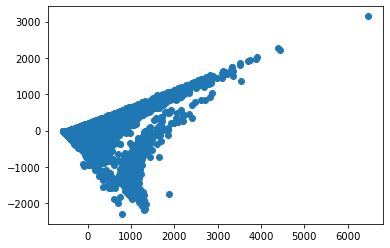

In [48]:
from matplotlib import pyplot as plt
x = [x[0] for x in train_X]
y = [x[1] for x in train_X]
plt.scatter(x,y)

In [33]:
bruh[1][0]

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([   4,  175,  991,   21, 4466,    5,  954, 3371,  205,   10,    5,
        106,  598,  877, 8013, 3836,   15,   21,    7, 7799, 4188,    3,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)>

In [7]:
summarizer = BasicSummarizer.load('manual_encodings_basicsummarizer1024_TEST')

In [ ]:
sample = [x for x in train[:10]]
outlines = []
for s in sample[:10]:
    print(s[1])
    outlines.append(f"Target: {s[1]}\tPredicted: {summarizer.predict(s[0])}\n")

Jubler over dansk trøffelfund: Tre gange større end dem i bøgerne - TV 2
Greta Thunberg har fået et dyr opkaldt efter sig
WiFi-frygt: 1.326 fly skal have skiftet cockpit-skærme
CL-vinder har fundet anden levevej: Folk ser ned på hans nye job
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/opt/conda/lib/python3.9/site-packages/keras/backend.py", line 4770, in <genexpr>
    ta.write(ta_index_to_write, out)  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/opt/conda/lib/python3.9/site-packages/keras/backend.py", line 4770, in <genexpr>
    ta.write(ta_index_to_write, out)  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


Derfor er der kæmpe spejle på Brøndby Stadion
Teenager stak sin mand under voldtægt: Nu risikerer hun dødsstraf
Stjal billedet ved OL: Her er håndtrykket der skriver historie
Bernie Sanders ramt af hjerteproblemer - aflyser planer
Nye adgangskrav til gymnasiet giver udfordringer for elever og gymnasier
Schweiz-boss: Danmark kommer til EM


In [ ]:
for i in outlines[:100]:
    print(i.split('\t'))